In [2]:
import numpy as np
import matplotlib.pyplot as plt

from modelbase.ode import Model, LabelModel, LinearLabelModel, Simulator, mca
from modelbase.ode import ratefunctions as rf

Steps to get a working model. (Pen and Paper >>>> Code and Computer)
1. Initiate the model
2. Add Compounds to the model.(Derivables)
3. Add Parameters to the model. (Standards and initials)
4. Add functions for reactions.
5. Add algebraic modules for the functions (not all, just the ones needed for other functions).
6. Add rest of the functions which will be calculated using the previous functions.
7. Add reactions for compounds.
8. Simulate the model using initial values for compounds.
9. Simulate for a certain amount of time.
10. Obtain values as a graph and array and list one by one. one compound by compound.
11. Observe and record the results
12. Copy model, run with different conditions in different notebooks. Record everything.

In [3]:
#1. Initiate the model
B=Model()

In [4]:
#2. Add Compounds to the model.(Derivables)

#This is a simple model of a plant with only leaves(G) and it survives on A-air, W-water and L-light. 
#and compost is composed of falling leaves which get reabsorbed by plant and is used as nutrition

B.add_compounds(["L","C"])

In [5]:
#3. Add Parameters to the model. (Standards and initials)
p={
"ao":0.5,
"eo":0.5,
"wo":1,
"f":0.4,
"sorp":0.2
}
B.add_parameters(p)

In [6]:
#4. Add functions for reactions.
def a (ao):
    return ao
def e (eo):
    return eo
def w (wo):
    return wo
def d (f, L):
    return f*L
def n (sorp, C):
    return sorp*C

In [7]:
#5. Add algebraic modules for the functions (not all, just the ones needed for other functions).
#none here i think
#6. Add rest of the functions which will be calculated using the previous functions.


In [8]:
#7. Add reactions for compounds.
B.add_reaction_from_args(
    rate_name="Air",
    function= a,
    stoichiometry={"L":1},
    args=["ao"]
)
B.add_reaction_from_args(
    rate_name="Water",
    function= w,
    stoichiometry={"L":1},
    args=["wo"]
)
B.add_reaction_from_args(
    rate_name="Light",
    function= e,
    stoichiometry={"L":1},
    args=["eo"]
)
B.add_reaction_from_args(
    rate_name="Death",
    function= d,
    stoichiometry={"L":-1,"C":1},
    args=["f","L"]
)
B.add_reaction_from_args(
    rate_name="Nutrition",
    function= n,
    stoichiometry={"L":1,"C":-1},
    args=["sorp","C"]
)


In [9]:
#justcheckpoint

B.get_rate_names()

['Air', 'Water', 'Light', 'Death', 'Nutrition']

In [10]:
B.get_stoichiometric_df()

,Air,Death,Light,Nutrition,Water
C,0.0,1.0,0.0,-1.0,0.0
L,1.0,-1.0,1.0,1.0,1.0


(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='Time', ylabel='No of leaves on the plant'>)

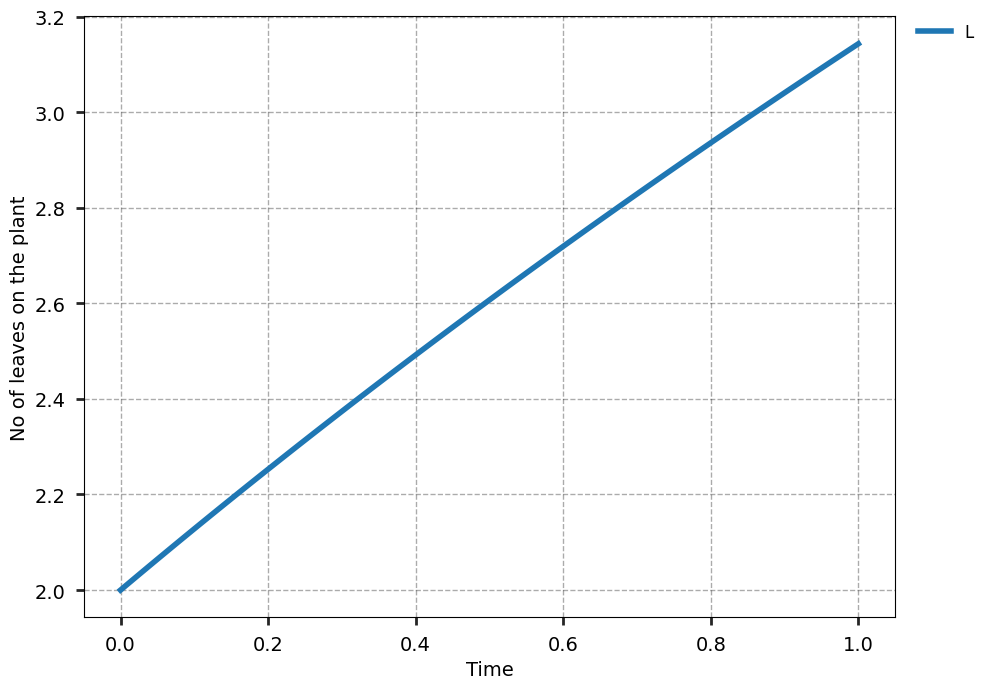

In [30]:
#8. Simulate the model using initial values for compounds.
#9. Simulate for a certain amount of time.

s=Simulator(B)
s.initialise ({"L":2,"C":0.5})
s.simulate(1)
s.plot_selection(["L"], xlabel="Time", ylabel="No of leaves on the plant")

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='Time', ylabel='No of leaves in compost'>)

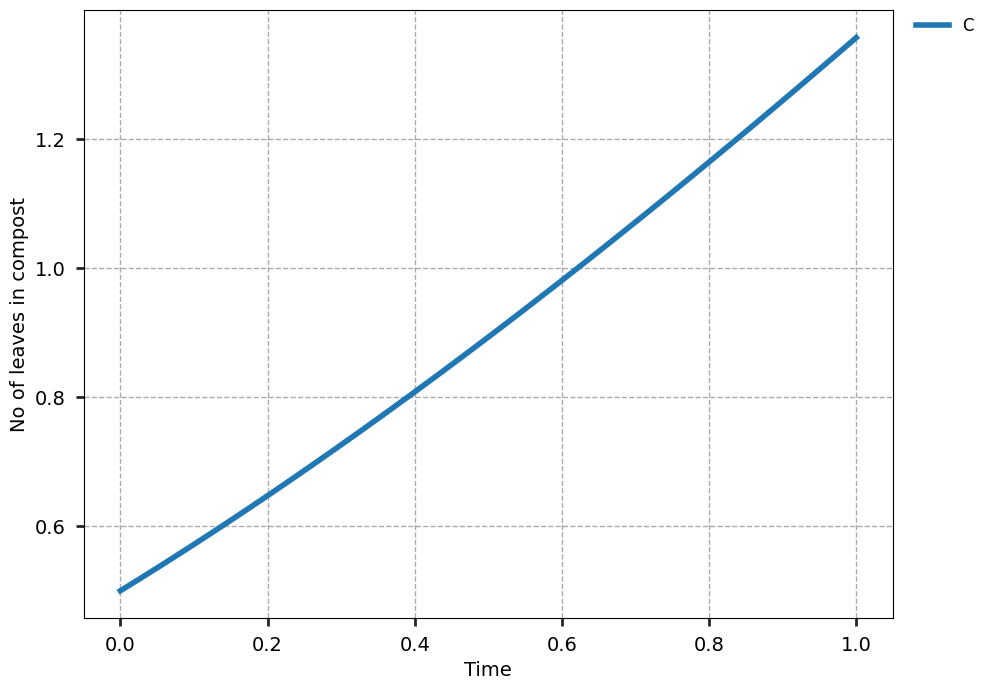

In [29]:
s.plot_selection(["C"], xlabel="Time", ylabel="No of leaves in compost")

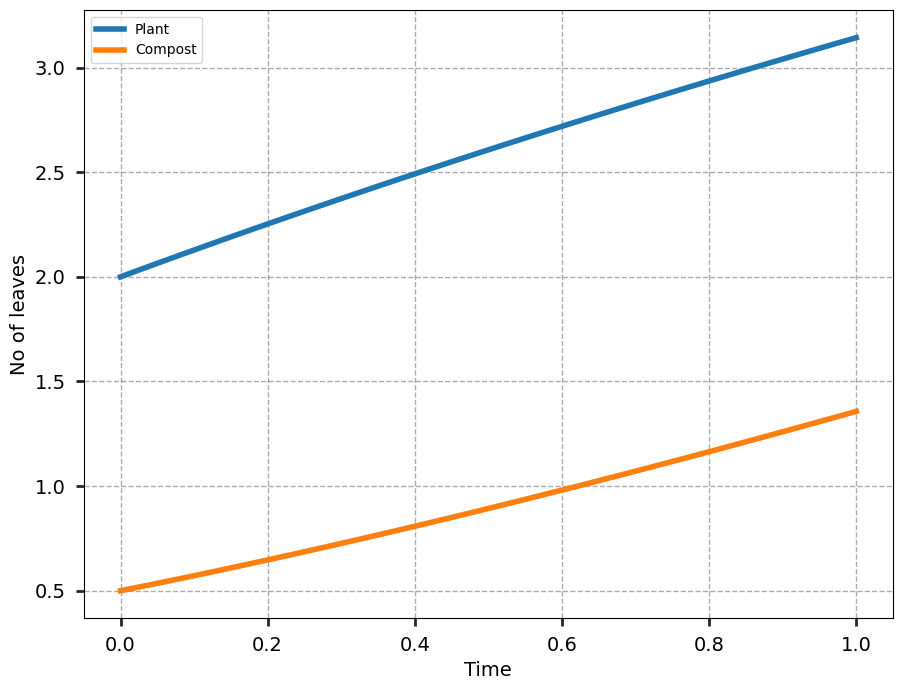

In [13]:
s = Simulator(B)
s.initialise({"L": 2, "C": 0.5})
s.simulate(1)
fig, ax = s.plot_selection(["L", "C"], xlabel="Time", ylabel="No of leaves")

# Set legend manually
legend_labels = ["Plant", "Compost"]
ax.legend(legend_labels)

# Show the plot
plt.show()


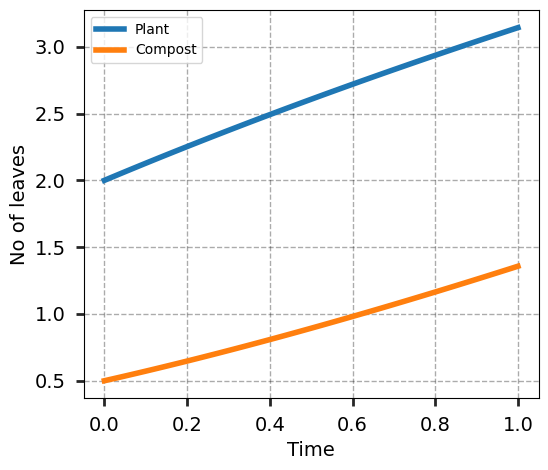

In [14]:
fig, ax = plt.subplots()
s = Simulator(B)
s.initialise({"L": 2, "C": 0.5})
s.simulate(1)
fig, ax = s.plot_selection(["L", "C"], xlabel="Time", ylabel="No of leaves",ax=ax)

ax.legend(["Plant", "Compost"])



In [15]:
a =  s.get_full_results_df()["L"]
b = s.get_full_results_df()["C"]

In [16]:
a

0.000000    2.000000
0.010101    2.013112
0.020202    2.026185
0.030303    2.039221
0.040404    2.052218
              ...   
0.959596    3.101770
0.969697    3.112090
0.979798    3.122388
0.989899    3.132665
1.000000    3.142921
Name: L, Length: 100, dtype: float64

In [17]:
b

0.000000    0.500000
0.010101    0.507090
0.020202    0.514219
0.030303    0.521386
0.040404    0.528591
              ...   
0.959596    1.317422
0.969697    1.327304
0.979798    1.337207
0.989899    1.347133
1.000000    1.357079
Name: C, Length: 100, dtype: float64

In [18]:
c=s.get_results_df()["L"]
c

0.000000    2.000000
0.010101    2.013112
0.020202    2.026185
0.030303    2.039221
0.040404    2.052218
              ...   
0.959596    3.101770
0.969697    3.112090
0.979798    3.122388
0.989899    3.132665
1.000000    3.142921
Name: L, Length: 100, dtype: float64

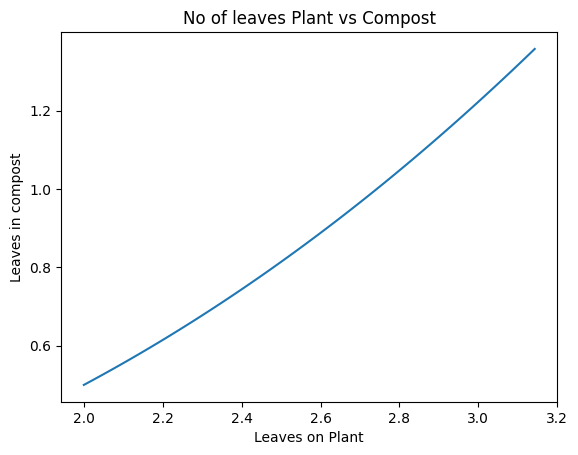

In [19]:
plt.title("No of leaves Plant vs Compost")
plt.xlabel("Leaves on Plant")
plt.ylabel("Leaves in compost")
plt.plot(a,b)

In [20]:
# Courtesy of ai 
#Obtain fluxes and other details
# Provide initial concentrations as 'y'
initial_concentrations = {"L": 2, "C": 0.5}

fluxes_dict = B.get_fluxes_dict(y=initial_concentrations)


print(fluxes_dict)


{'Air': array([0.5]), 'Water': array([1.]), 'Light': array([0.5]), 'Death': array([0.8]), 'Nutrition': array([0.1])}


In [21]:
fluxes_dict = B.get_fluxes_dict(y={"L": 2, "C": 0.5})
print(fluxes_dict)

{'Air': array([0.5]), 'Water': array([1.]), 'Light': array([0.5]), 'Death': array([0.8]), 'Nutrition': array([0.1])}


In [22]:
B.get_stoichiometric_matrix()

array([[ 0.,  1.,  0., -1.,  0.],
       [ 1., -1.,  1.,  1.,  1.]])

In [23]:
B.get_stoichiometries_by_compounds()

{'L': {'Air': 1, 'Water': 1, 'Light': 1, 'Death': -1, 'Nutrition': 1},
 'C': {'Death': 1, 'Nutrition': -1}}

In [24]:
B.get_compounds()

['L', 'C']

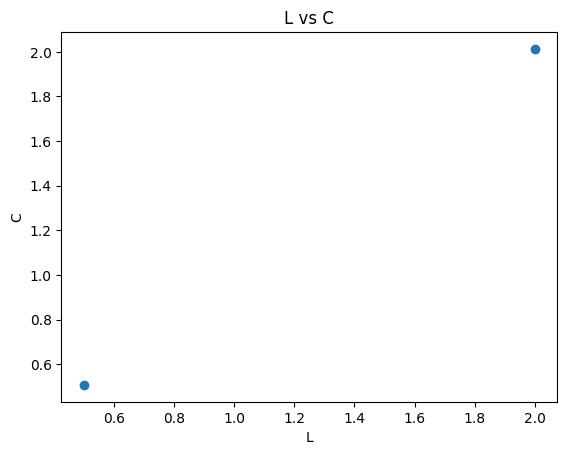

In [37]:
s = Simulator(B)
s.initialise({"L": 2, "C": 0.5})
s.simulate(1)

# Assuming s.results is a list of tuples
L_values = [result[0] for result in s.results]  # Assuming "L" is the first value in each tuple
C_values = [result[1] for result in s.results]  # Assuming "C" is the second value in each tuple

# Plotting "L" vs "C"
fig, ax = plt.subplots()
ax.scatter(L_values, C_values) #this command lead to a scatter plot instead of line plot (need tofigure out why and how to get what i want instead!!!)
ax.set_xlabel("L")
ax.set_ylabel("C")
ax.set_title("L vs C")
plt.show()




In [26]:
l= s.get_full_results_array()
print (l)

[[2.         0.5       ]
 [2.01311197 0.50709005]
 [2.02618541 0.51421863]
 [2.03922052 0.52138554]
 [2.05221756 0.52859052]
 [2.06517677 0.53583333]
 [2.07809836 0.54311376]
 [2.09098257 0.55043158]
 [2.10382961 0.55778655]
 [2.11663972 0.56517846]
 [2.12941311 0.57260709]
 [2.14215002 0.5800722 ]
 [2.15485065 0.58757359]
 [2.16751523 0.59511103]
 [2.18014398 0.6026843 ]
 [2.19273711 0.6102932 ]
 [2.20529483 0.61793749]
 [2.21781737 0.62561697]
 [2.23030494 0.63333143]
 [2.24275773 0.64108065]
 [2.25517598 0.64886443]
 [2.26755987 0.65668255]
 [2.27990963 0.66453481]
 [2.29222546 0.672421  ]
 [2.30450756 0.68034092]
 [2.31675614 0.68829437]
 [2.32897139 0.69628113]
 [2.34115353 0.70430101]
 [2.35330275 0.71235382]
 [2.36541925 0.72043934]
 [2.37750322 0.72855738]
 [2.38955487 0.73670775]
 [2.40157439 0.74489026]
 [2.41356197 0.75310469]
 [2.42551781 0.76135087]
 [2.4374421  0.76962861]
 [2.44933503 0.7779377 ]
 [2.46119678 0.78627796]
 [2.47302756 0.79464921]
 [2.48482753 0.80305125]


In [27]:
s.get_full_results_and_fluxes_df()

(                 L         C
 0.000000  2.000000  0.500000
 0.010101  2.013112  0.507090
 0.020202  2.026185  0.514219
 0.030303  2.039221  0.521386
 0.040404  2.052218  0.528591
 ...            ...       ...
 0.959596  3.101770  1.317422
 0.969697  3.112090  1.327304
 0.979798  3.122388  1.337207
 0.989899  3.132665  1.347133
 1.000000  3.142921  1.357079
 
 [100 rows x 2 columns],
           Air  Water  Light     Death  Nutrition
 0.000000  0.5    1.0    0.5  0.800000   0.100000
 0.010101  0.5    1.0    0.5  0.805245   0.101418
 0.020202  0.5    1.0    0.5  0.810474   0.102844
 0.030303  0.5    1.0    0.5  0.815688   0.104277
 0.040404  0.5    1.0    0.5  0.820887   0.105718
 ...       ...    ...    ...       ...        ...
 0.959596  0.5    1.0    0.5  1.240708   0.263484
 0.969697  0.5    1.0    0.5  1.244836   0.265461
 0.979798  0.5    1.0    0.5  1.248955   0.267441
 0.989899  0.5    1.0    0.5  1.253066   0.269427
 1.000000  0.5    1.0    0.5  1.257168   0.271416
 
 [100 rows 

In [28]:
s = Simulator(B)
s.initialise({"L": 2, "C": 0.5})
s.simulate(1)


(array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
        0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
        0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
        0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
        0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
        0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
        0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
        0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
        0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
        0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
        0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
        0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
        0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
        0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
        0.70707071, 0.71717172, 0.72727273, 0.73

Questions that could be asked?
1. What happens to no. of leaves on plants if i take away the light or air or water or nutrtion?
2. What heppens if the death of leaves is higher than the no of leaves grown per day?
3. what happens if the reabsorption of leaves is higher than decomposing or death of leaves? 

what would you intuitively expect??
1. No of leaves on plants will decrease and consequently no if leaves going into decomposing will decrease.
2. We will end up with plants with little to no leaves while the garbage leaves will increase but need to think if the reabsorption factor is high enough to restore the leaves of the plant??
3. inutively the nutrition will run out before it is replensihed at the certain point, just like the above point.

Good this seems like something computation can decipher, phew...

Question 1. What happens to no. of leaves on plants if i take away the light or air or water or nutrtion?

Do these and record the results.

change the parameters ao, eo, lo

for nutrition change the reabsorption factor.


This is what AI answered for the question of - What do you understand through this model

From the provided model and simulation, we can infer the following:

1. **Compounds**: The model includes two compounds, "L" and "C", representing quantities related to a plant and compost, respectively.

2. **Parameters**: Several parameters are defined in the model, such as "ao", "eo", "wo", "f", and "sorp". These parameters likely influence the dynamics of the system and the interactions between the compounds.

3. **Reactions**: The model defines various reactions, such as "Air", "Water", "Light", "Death", and "Nutrition", each with its respective function and stoichiometry. These reactions represent processes like absorption of air, water, and light by the plant, death of leaves contributing to compost, and absorption of compost by the plant for nutrition.

4. **Simulation**: The simulation is conducted for 1 unit of time (possibly representing days). The initial concentrations of "L" (plant) and "C" (compost) are set to 2 and 0.5, respectively.

5. **Extrapolation**: The simulation is then extrapolated over 10 days to observe the relationship between the concentrations of "L" and "C" over time.

6. **Plotting**: The results of the simulation are plotted to visualize the dynamics of "L" and "C" concentrations over time.

In summary, this model seems to represent a simplified ecosystem involving a plant (with leaves represented by "L") and compost (represented by "C"), with interactions such as absorption of air, water, and light by the plant, death of leaves contributing to compost, and absorption of compost by the plant for nutrition. The simulation and extrapolation help in understanding how the concentrations of these compounds change over time and how they influence each other within the ecosystem.

i asked AI

Can these questions be answered using this model?
1. What happens to no. of leaves on plants if i take away the light or air or water or nutrtion?
2. What heppens if the death of leaves is higher than the no of leaves grown per day?
3. what happens if the reabsorption of leaves is higher than decomposing or death of leaves? 

are these the answers that you would intuitively expect. what do you think?
1. No of leaves on plants will decrease and consequently no if leaves going into decomposing will decrease.
2. We will end up with plants with little to no leaves while the garbage leaves will increase but need to think if the reabsorption factor is high enough to restore the leaves of the plant??
3. inutively the nutrition will run out before it is replensihed at the certain point, just like the above point. are there any other questions that you think i can decipher through this model

its answer:

### Addressing the Questions Using the Model

Your model can indeed be used to explore these questions. Let's break down each one and how the model can be used to answer it.

#### 1. What happens to the number of leaves on plants if I take away the light or air or water or nutrition?

To simulate this:
- **Light (`eo`)**: Set the parameter for light (`eo`) to zero and simulate.
- **Air (`ao`)**: Set the parameter for air (`ao`) to zero and simulate.
- **Water (`wo`)**: Set the parameter for water (`wo`) to zero and simulate.
- **Nutrition (`sorp`)**: Set the parameter for nutrition absorption (`sorp`) to zero and simulate.

**Expected Answer**:
- The number of leaves will decrease because the plant cannot perform photosynthesis (light), cannot absorb necessary gases (air), or cannot take up water. Each of these factors is crucial for plant growth. If the plant cannot absorb nutrition, the number of leaves will also decrease, affecting the compost levels as fewer leaves will fall and decompose.

#### 2. What happens if the death of leaves is higher than the number of leaves grown per day?

To simulate this:
- Increase the death rate parameter (`f`) significantly and simulate.

**Expected Answer**:
- The number of leaves will decline as the death rate surpasses the growth rate. This will result in an increase in the compost (`C`) as more leaves die and decompose.

#### 3. What happens if the reabsorption of leaves is higher than decomposing or death of leaves?

To simulate this:
- Increase the reabsorption rate parameter (`sorp`) and observe its effect relative to the death rate (`f`).

**Expected Answer**:
- If the reabsorption rate is higher, more leaves will be converted back into plant biomass instead of decomposing. This could potentially stabilize or even increase the number of leaves, assuming other factors (light, air, water) are sufficient. If reabsorption is too high, compost levels might decrease significantly.

### Intuitive Expectations and Model Behavior

Your intuitions about the outcomes align well with general ecological and physiological principles:

1. **Decrease in Light, Air, Water, or Nutrition**:
   - **Decrease in Leaves**: Without these essential resources, plants cannot grow or sustain leaves, leading to a decrease in leaf number.
   - **Decrease in Decomposition**: Fewer leaves result in less material for decomposition.

2. **Higher Death Rate than Growth Rate**:
   - **Decrease in Leaves**: This leads to a net loss of leaves.
   - **Increase in Compost**: More dead leaves contribute to the compost pile.

3. **Higher Reabsorption than Decomposition**:
   - **Balanced or Increased Leaves**: Effective reabsorption can help maintain or even increase leaf biomass.
   - **Decreased Compost**: Less leaf material remains to decompose, lowering compost levels over time.

### Additional Questions

Here are a few more questions you could explore with this model:

4. **What is the effect of varying the initial number of leaves (`L`) or compost (`C`) on long-term plant growth and compost levels?**
   - **Simulation**: Run simulations with different initial conditions.

5. **How does the interplay between reabsorption rate and death rate affect long-term stability?**
   - **Simulation**: Explore a range of values for `f` and `sorp` to see their combined effects.

6. **What is the effect of periodic changes in light or water availability (e.g., simulating seasons)?**
   - **Simulation**: Introduce periodic variations in `eo` or `wo` to mimic seasonal changes.

### Conclusion

By systematically adjusting parameters and running simulations, this model provides valuable insights into the dynamics of leaf growth, death, and nutrient cycling in plants. The results from these simulations can help confirm or refine your intuitive expectations about plant growth and ecosystem dynamics.


Give me some more insight of what can be improved in this model because it seems far from reality

To bring the model closer to reality and enhance its usefulness, several aspects can be improved. Here are some suggestions:

### 1. **Incorporate Additional Plant Components**
   - **Roots and Stem**: Introduce additional compartments for roots and stem. These are crucial for nutrient uptake and structural support, respectively.
   - **Different Leaf Ages**: Differentiate between young and old leaves as their rates of photosynthesis, respiration, and death vary.

### 2. **Add More Detailed Nutrient Cycling**
   - **Soil Nutrient Pool**: Include a soil nutrient compartment where decomposed leaves contribute nutrients. Plants can absorb these nutrients through roots.
   - **Nutrient Limitation**: Make leaf growth dependent not only on light, air, and water but also on nutrient availability in the soil.

### 3. **Include Environmental Factors**
   - **Temperature**: Model the effect of temperature on growth rates, decomposition rates, and nutrient uptake.
   - **Seasonal Variations**: Introduce seasonal changes in light, temperature, and water availability to simulate more realistic growth patterns.
   - **Pests and Diseases**: Factor in the impact of pests and diseases on leaf death and overall plant health.

### 4. **Non-linear Growth and Death Rates**
   - **Saturation Effects**: Implement non-linear growth functions that reflect saturation effects at high resource levels.
   - **Density-Dependent Death Rates**: Make leaf death rates dependent on the density of leaves to simulate competition and self-shading.

### 5. **Water and Nutrient Uptake Dynamics**
   - **Water Uptake**: Model water uptake as a function of soil moisture and root system efficiency.
   - **Nutrient Uptake**: Include dynamic nutrient uptake rates that depend on soil nutrient concentration and root health.

### 6. **Feedback Mechanisms**
   - **Compost Decomposition**: Introduce feedback where the rate of compost decomposition depends on soil microbial activity, which is influenced by temperature and moisture.
   - **Nutrient Reabsorption**: Make nutrient reabsorption dependent on the overall health of the plant and the availability of nutrients in the soil.

### 7. **Stochastic Elements**
   - **Random Events**: Incorporate stochastic elements to simulate random events such as droughts, floods, or pest outbreaks.
   - **Genetic Variability**: Add variability to simulate differences in growth and resilience among individual plants.

### 8. **Detailed Photosynthesis and Respiration Models**
   - **Photosynthesis**: Implement a more detailed model of photosynthesis that considers light intensity, CO2 concentration, and leaf age.
   - **Respiration**: Include a respiration model that accounts for maintenance respiration and growth respiration.

### 9. **Interactions with Other Organisms**
   - **Symbiotic Relationships**: Model interactions with mycorrhizal fungi and nitrogen-fixing bacteria.
   - **Herbivory**: Include the effects of herbivores on leaf biomass and plant health.

### 10. **Data Integration and Validation**
   - **Empirical Data**: Use empirical data to parameterize and validate the model.
   - **Field Trials**: Conduct field trials to collect data for model calibration and validation.

### Example of a More Complex Model

Here's a brief outline of how a more complex model could be structured:

```python
# Define the complex model
complex_model = Model()

# Add compartments
complex_model.add_compounds(["Leaves", "Roots", "Stem", "Compost", "SoilNutrients"])

# Add parameters
params = {
    "light_intensity": 0.5,
    "co2_concentration": 0.04,
    "water_availability": 1.0,
    "nutrient_availability": 0.5,
    "temp": 25,
    "pest_pressure": 0.1,
    "growth_rate": 0.05,
    "death_rate": 0.01,
    "reabsorption_rate": 0.02,
    "decomposition_rate": 0.03
}
complex_model.add_parameters(params)

# Define complex functions for growth, death, and nutrient cycling
def photosynthesis(light_intensity, co2_concentration, leaf_biomass):
    return light_intensity * co2_concentration * leaf_biomass / (1 + leaf_biomass)

def respiration(temp, leaf_biomass):
    return 0.02 * leaf_biomass * np.exp(0.1 * (temp - 25))

def nutrient_uptake(nutrient_availability, root_biomass):
    return nutrient_availability * root_biomass / (1 + root_biomass)

# Add reactions
complex_model.add_reaction_from_args(
    rate_name="Photosynthesis",
    function=photosynthesis,
    stoichiometry={"Leaves": 1},
    args=["light_intensity", "co2_concentration", "Leaves"]
)
complex_model.add_reaction_from_args(
    rate_name="Respiration",
    function=respiration,
    stoichiometry={"Leaves": -1},
    args=["temp", "Leaves"]
)
complex_model.add_reaction_from_args(
    rate_name="NutrientUptake",
    function=nutrient_uptake,
    stoichiometry={"Leaves": 1, "SoilNutrients": -1},
    args=["nutrient_availability", "Roots"]
)
# Continue adding other reactions and components...

# Simulate the model
simulator = Simulator(complex_model)
simulator.initialise({"Leaves": 2, "Roots": 1, "Stem": 0.5, "Compost": 0.5, "SoilNutrients": 1})
simulator.simulate(10)

# Plot results
results = simulator.results
plt.plot(results['Time'], results['Leaves'], label='Leaves')
plt.plot(results['Time'], results['Roots'], label='Roots')
plt.plot(results['Time'], results['Stem'], label='Stem')
plt.xlabel('Time (days)')
plt.ylabel('Biomass')
plt.legend()
plt.show()
```

### Conclusion

Improving the model involves adding more biological realism and complexity. This includes more detailed compartments, environmental interactions, non-linear growth dynamics, and feedback mechanisms. By integrating empirical data and validating the model with real-world observations, the model can become a powerful tool for understanding plant growth and nutrient cycling in various environmental conditions.

From here on I am trying to understand how to extract data over 10 days and plot a graph. So first step is learn what type of format does s.simulator provide the data in. 
Next how to extract it.
Next how to direct it to mat plot as a list or dict to be plotted as basically (a,b).


In [43]:
# Initialize and simulate the system over 10 days
s = Simulator(B)
s.initialise({"L": 2, "C": 0.5})
s.simulate(10)  # Simulate for 10 days

# Inspect the results structure
print(s.results)


[array([[ 2.        ,  0.5       ],
       [ 2.12941311,  0.57260709],
       [ 2.25517598,  0.64886443],
       [ 2.37750322,  0.72855738],
       [ 2.4965969 ,  0.81148391],
       [ 2.61264714,  0.89745387],
       [ 2.72583291,  0.9862883 ],
       [ 2.8363227 ,  1.07781872],
       [ 2.94427501,  1.17188661],
       [ 3.04983908,  1.26834274],
       [ 3.15315534,  1.36704668],
       [ 3.25435599,  1.46786623],
       [ 3.35356543,  1.57067699],
       [ 3.45090076,  1.67536187],
       [ 3.54647217,  1.78181066],
       [ 3.64038341,  1.88991962],
       [ 3.73273213,  1.9995911 ],
       [ 3.82361019,  2.11073324],
       [ 3.91310407,  2.22325957],
       [ 4.00129517,  2.33708867],
       [ 4.08826009,  2.45214395],
       [ 4.17407096,  2.56835329],
       [ 4.25879562,  2.68564882],
       [ 4.34249798,  2.80396667],
       [ 4.42523812,  2.92324673],
       [ 4.50707265,  3.0434324 ],
       [ 4.58805482,  3.16447043],
       [ 4.66823475,  3.2863107 ],
       [ 4.74765962

[array([[ 2.        ,  0.5       ],
       [ 2.12941311,  0.57260709],
       [ 2.25517598,  0.64886443],
       [ 2.37750322,  0.72855738],
       [ 2.4965969 ,  0.81148391],
       [ 2.61264714,  0.89745387],
       [ 2.72583291,  0.9862883 ],
       [ 2.8363227 ,  1.07781872],
       [ 2.94427501,  1.17188661],
       [ 3.04983908,  1.26834274],
       [ 3.15315534,  1.36704668],
       [ 3.25435599,  1.46786623],
       [ 3.35356543,  1.57067699],
       [ 3.45090076,  1.67536187],
       [ 3.54647217,  1.78181066],
       [ 3.64038341,  1.88991962],
       [ 3.73273213,  1.9995911 ],
       [ 3.82361019,  2.11073324],
       [ 3.91310407,  2.22325957],
       [ 4.00129517,  2.33708867],
       [ 4.08826009,  2.45214395],
       [ 4.17407096,  2.56835329],
       [ 4.25879562,  2.68564882],
       [ 4.34249798,  2.80396667],
       [ 4.42523812,  2.92324673],
       [ 4.50707265,  3.0434324 ],
       [ 4.58805482,  3.16447043],
       [ 4.66823475,  3.2863107 ],
       [ 4.74765962

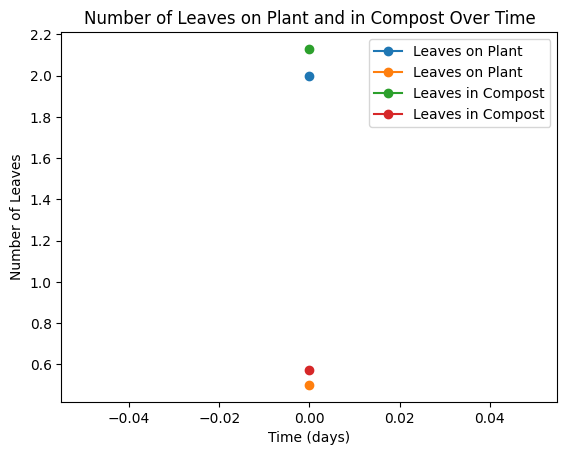

In [44]:
import matplotlib.pyplot as plt

# Initialize and simulate the system over 10 days
s = Simulator(B)
s.initialise({"L": 2, "C": 0.5})
s.simulate(10)  # Simulate for 10 days

# Inspect the results structure
print(s.results)

# Assuming s.results is a list of lists or tuples
# For example: [[L1, C1], [L2, C2], ..., [Ln, Cn]]

# Extracting the values
time_points = list(range(len(s.results)))  # Generate time points based on the length of results
L_values = [result[0] for result in s.results]  # Assuming "L" is the first value in each sublist/tuple
C_values = [result[1] for result in s.results]  # Assuming "C" is the second value in each sublist/tuple

# Plotting "L" and "C" over time
fig, ax = plt.subplots()
ax.plot(time_points, L_values, label='Leaves on Plant', marker='o')
ax.plot(time_points, C_values, label='Leaves in Compost', marker='o')
ax.set_xlabel("Time (days)")
ax.set_ylabel("Number of Leaves")
ax.set_title("Number of Leaves on Plant and in Compost Over Time")
ax.legend()
plt.show()


In [50]:
import matplotlib.pyplot as plt

# Initialize and simulate the system over 10 days
s = Simulator(B)
s.initialise({"L": 2, "C": 0.5})
s.simulate(10)  # Simulate for 10 days

# Inspect the results structure
print(s.results)

# Assuming s.results is a list of dictionaries
# For example: [{'Time': 0, 'L': 2, 'C': 0.5}, {'Time': 1, 'L': 2.1, 'C': 0.6}, ...]

time_points = [result['Time'] for result in s.results]
L_values = [result['L'] for result in s.results]
C_values = [result['C'] for result in s.results]

# Ensure the extracted values have the same length as time_points
if len(L_values) != len(time_points) or len(C_values) != len(time_points):
    raise ValueError("Extracted values do not match the length of time_points")

# Plotting "L" and "C" over time
fig, ax = plt.subplots()
ax.plot(time_points, L_values, label='Leaves on Plant', marker='o')
ax.plot(time_points, C_values, label='Leaves in Compost', marker='o')
ax.set_xlabel("Time (days)")
ax.set_ylabel("Number of Leaves")
ax.set_title("Number of Leaves on Plant and in Compost Over Time")
ax.legend()
plt.show()



[array([[ 2.        ,  0.5       ],
       [ 2.12941311,  0.57260709],
       [ 2.25517598,  0.64886443],
       [ 2.37750322,  0.72855738],
       [ 2.4965969 ,  0.81148391],
       [ 2.61264714,  0.89745387],
       [ 2.72583291,  0.9862883 ],
       [ 2.8363227 ,  1.07781872],
       [ 2.94427501,  1.17188661],
       [ 3.04983908,  1.26834274],
       [ 3.15315534,  1.36704668],
       [ 3.25435599,  1.46786623],
       [ 3.35356543,  1.57067699],
       [ 3.45090076,  1.67536187],
       [ 3.54647217,  1.78181066],
       [ 3.64038341,  1.88991962],
       [ 3.73273213,  1.9995911 ],
       [ 3.82361019,  2.11073324],
       [ 3.91310407,  2.22325957],
       [ 4.00129517,  2.33708867],
       [ 4.08826009,  2.45214395],
       [ 4.17407096,  2.56835329],
       [ 4.25879562,  2.68564882],
       [ 4.34249798,  2.80396667],
       [ 4.42523812,  2.92324673],
       [ 4.50707265,  3.0434324 ],
       [ 4.58805482,  3.16447043],
       [ 4.66823475,  3.2863107 ],
       [ 4.74765962

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [51]:
s = Simulator(B)
s.initialise({"L": 2, "C": 0.5})
s.simulate(10)  # Simulate for 10 days

# Print the results to understand its structure
print(s.results)


[array([[ 2.        ,  0.5       ],
       [ 2.12941311,  0.57260709],
       [ 2.25517598,  0.64886443],
       [ 2.37750322,  0.72855738],
       [ 2.4965969 ,  0.81148391],
       [ 2.61264714,  0.89745387],
       [ 2.72583291,  0.9862883 ],
       [ 2.8363227 ,  1.07781872],
       [ 2.94427501,  1.17188661],
       [ 3.04983908,  1.26834274],
       [ 3.15315534,  1.36704668],
       [ 3.25435599,  1.46786623],
       [ 3.35356543,  1.57067699],
       [ 3.45090076,  1.67536187],
       [ 3.54647217,  1.78181066],
       [ 3.64038341,  1.88991962],
       [ 3.73273213,  1.9995911 ],
       [ 3.82361019,  2.11073324],
       [ 3.91310407,  2.22325957],
       [ 4.00129517,  2.33708867],
       [ 4.08826009,  2.45214395],
       [ 4.17407096,  2.56835329],
       [ 4.25879562,  2.68564882],
       [ 4.34249798,  2.80396667],
       [ 4.42523812,  2.92324673],
       [ 4.50707265,  3.0434324 ],
       [ 4.58805482,  3.16447043],
       [ 4.66823475,  3.2863107 ],
       [ 4.74765962

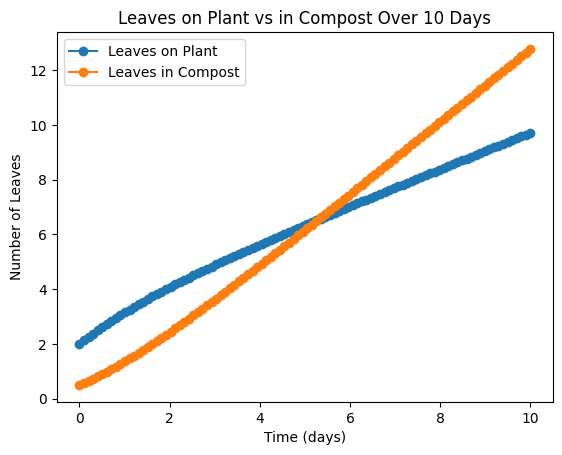

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize and run the simulation
s = Simulator(B)
s.initialise({"L": 2, "C": 0.5})
s.simulate(10)  # Simulate for 10 days

# Extract the results
results = s.results[0]  # Get the NumPy array from the list
time_points = np.linspace(0, 10, results.shape[0])  # Generate time points for the 10 days
# (The number of rows in results is obtained using results.shape[0], which returns the number of elements in the first dimension of the array, i.e., the number of rows.)
L_values = results[:, 0]  # Extract the L values (first column)
C_values = results[:, 1]  # Extract the C values (second column)

# Plotting "L" and "C" over time
fig, ax = plt.subplots()
ax.plot(time_points, L_values, label='Leaves on Plant', marker='o')
ax.plot(time_points, C_values, label='Leaves in Compost', marker='o')
ax.set_xlabel("Time (days)")
ax.set_ylabel("Number of Leaves")
ax.set_title("Leaves on Plant vs in Compost Over 10 Days")
ax.legend() #need to understand how this took the values from label above. does that mean i had to include it everytime in the data above and not just later or will it work the same if i put it as a list later too??? 
plt.show()


Explanation for the code above
Of course! Let's break down each line of code:

1. `results = s.results[0]`: 
   - `s.results` refers to the results of the simulation stored in the variable `s`. 
   - `s.results` is a list containing a single NumPy array. 
   - Since we're assuming there's only one simulation result, we access this array using `[0]`. This extracts the NumPy array from the list and assigns it to the variable `results`.

2. `time_points = np.linspace(0, 10, results.shape[0])`: 
   - `np.linspace` is a function from the NumPy library used to generate evenly spaced numbers over a specified interval. 
   - Here, it generates an array of time points ranging from 0 to 10, inclusive, with the number of points equal to the number of rows in the `results` array. 
   - The number of rows in `results` is obtained using `results.shape[0]`, which returns the number of elements in the first dimension of the array, i.e., the number of rows.

3. `L_values = results[:, 0]`: 
   - This line extracts the values from the first column of the `results` array and assigns them to the variable `L_values`. 
   - The syntax `[:, 0]` is a form of indexing in NumPy. The colon `:` before the comma indicates that we want to include all rows of the array, and `0` after the comma indicates that we want to select only the elements from the first column.

4. `C_values = results[:, 1]`: 
   - Similar to the previous line, this line extracts the values from the second column of the `results` array and assigns them to the variable `C_values`. 
   - Again, the syntax `[:, 1]` means all rows (`:`) from the second column (`1`).

So, in summary, this block of code extracts the time points, the values of `L` (number of leaves on the plant), and the values of `C` (number of leaves in the compost) from the simulation results and stores them in separate variables for further analysis and plotting.

Absolutely! Let's break down the code for plotting "L" and "C" over time:

1. `fig, ax = plt.subplots()`: 
   - This line creates a new figure and axes for the plot using `plt.subplots()`. 
   - The `fig` variable represents the entire figure, while `ax` represents a single axis (or subplot) within the figure. 

2. `ax.plot(time_points, L_values, label='Leaves on Plant', marker='o')`:
   - This line plots the values of "L" (number of leaves on the plant) over time on the axes `ax`. 
   - `time_points` are the x-values, `L_values` are the y-values, and `label='Leaves on Plant'` provides a label for the plot. 
   - The `marker='o'` argument specifies that circular markers should be used to indicate each data point.

3. `ax.plot(time_points, C_values, label='Leaves in Compost', marker='o')`:
   - Similarly, this line plots the values of "C" (number of leaves in the compost) over time on the same axes `ax`. 
   - The `label='Leaves in Compost'` argument provides a label for this plot.

4. `ax.set_xlabel("Time (days)")` and `ax.set_ylabel("Number of Leaves")`: 
   - These lines set the labels for the x-axis and y-axis, respectively.

5. `ax.set_title("Leaves on Plant vs in Compost Over 10 Days")`: 
   - This line sets the title of the plot.

6. `ax.legend()`: 
   - This line adds a legend to the plot, which automatically takes the labels provided in the `plot()` function calls. 
   - The legend function looks for the labels specified in the plot commands and creates a legend accordingly.

7. `plt.show()`: 
   - Finally, this command displays the plot.

So, by creating a single figure with two axes (`ax`), we can plot both "L" and "C" over time on the same graph. The legend function then combines the labels from both plot commands into a single legend, making it easy to distinguish between the two datasets.

Answer to the legend confusion.

Yes, you can add a legend without specifying the labels in each `plot()` call. Instead, you can pass the labels directly to the `ax.legend()` function. Here's how you can do it:

```python
# Plotting "L" and "C" over time
fig, ax = plt.subplots()
ax.plot(time_points, L_values, marker='o')
ax.plot(time_points, C_values, marker='o')
ax.set_xlabel("Time (days)")
ax.set_ylabel("Number of Leaves")
ax.set_title("Leaves on Plant vs in Compost Over 10 Days")
ax.legend(['Leaves on Plant', 'Leaves in Compost'])
plt.show()
```

In this code:
- We don't specify the labels in the `plot()` calls.
- Instead, we pass a list of labels directly to `ax.legend()`.
- Matplotlib will automatically assign these labels to the respective plots based on their order in the legend. The first label corresponds to the first plot, and so on.